In [6]:
import tensorflow as tf

In [7]:
print(tf.__version__)

2.13.0


In [4]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2023-09-27 20:33:56--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.10, 205.185.216.42
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  7.54MB/s    in 11s     

2023-09-27 20:34:08 (6.19 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [8]:
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [9]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [10]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    shear_range = 0.2,
    fill_mode = 'nearest'
)
 
test_datagen = ImageDataGenerator(
    rescale=1./255)

In [12]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [13]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [15]:
# compile model dengan 'adam' optimizer loss function 'binary_crossentropy' 
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [16]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 9s - loss: 0.7551 - accuracy: 0.4900 - val_loss: 0.6928 - val_accuracy: 0.5000 - 9s/epoch - 346ms/step
Epoch 2/20
25/25 - 5s - loss: 0.6992 - accuracy: 0.4600 - val_loss: 0.6927 - val_accuracy: 0.8500 - 5s/epoch - 210ms/step
Epoch 3/20
25/25 - 8s - loss: 0.6857 - accuracy: 0.6700 - val_loss: 0.6398 - val_accuracy: 0.8000 - 8s/epoch - 311ms/step
Epoch 4/20
25/25 - 7s - loss: 0.7111 - accuracy: 0.6000 - val_loss: 0.6951 - val_accuracy: 0.5000 - 7s/epoch - 292ms/step
Epoch 5/20
25/25 - 5s - loss: 0.6934 - accuracy: 0.5200 - val_loss: 0.6933 - val_accuracy: 0.5000 - 5s/epoch - 195ms/step
Epoch 6/20
25/25 - 14s - loss: 0.6975 - accuracy: 0.4500 - val_loss: 0.6915 - val_accuracy: 0.5000 - 14s/epoch - 579ms/step
Epoch 7/20
25/25 - 11s - loss: 0.6939 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.5000 - 11s/epoch - 438ms/step
Epoch 8/20
25/25 - 7s - loss: 0.6919 - accuracy: 0.5500 - val_loss: 0.6613 - val_accuracy: 0.7000 - 7s/epoch - 271ms/step
Epoch 9/20
25/25 - 5

1/1 [==============================] - 0s 38ms/step
clean


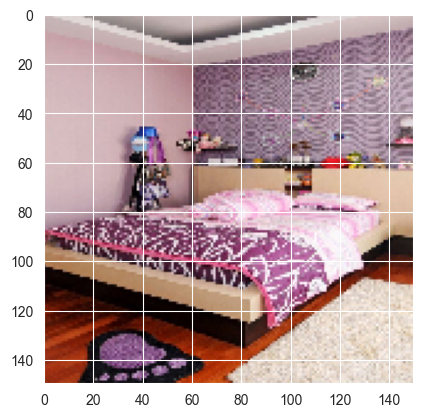

In [18]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load your pre-trained model here
# model = load_model('your_model.h5')

# Input file path manually
file_path = input("Enter the file path of the image: ")

# Predicting the image
img = image.load_img(file_path, target_size=(150, 150))

imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)

if classes[0] == 0:
    print('clean')
else:
    print('messy')
